# 2.5.3 Regresión logística multinomial

**Regresión logística multinomial:** $\;$ categórica condicional de logits lineales con la entrada
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid \mathcal{S}(\boldsymbol{a}))
\quad\text{con}\quad%
\boldsymbol{a}=f(\boldsymbol{x};\boldsymbol{\theta})=\mathbf{W}^t\boldsymbol{x}+\boldsymbol{b},\;\mathbf{W}\in\mathbb{R}^{D\times C},\;\boldsymbol{b}\in\mathbb{R}^C$$

**Ejemplo:** $\,\boldsymbol{x}\in[0, 1]^2,\,C=4,%
\,\mathbf{W}=\begin{pmatrix}1&-1&-1&1\\1&1&-1&-1\end{pmatrix},%
\,\boldsymbol{b}=\boldsymbol{0}_C$

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.special import logsumexp
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
XX = np.c_[np.ravel(x1), np.ravel(x2)]; b = np.zeros(4)
Wt = np.array([[1, -1, -1, 1], [1, 1, -1, -1]]).astype(float); A = XX @ Wt + b

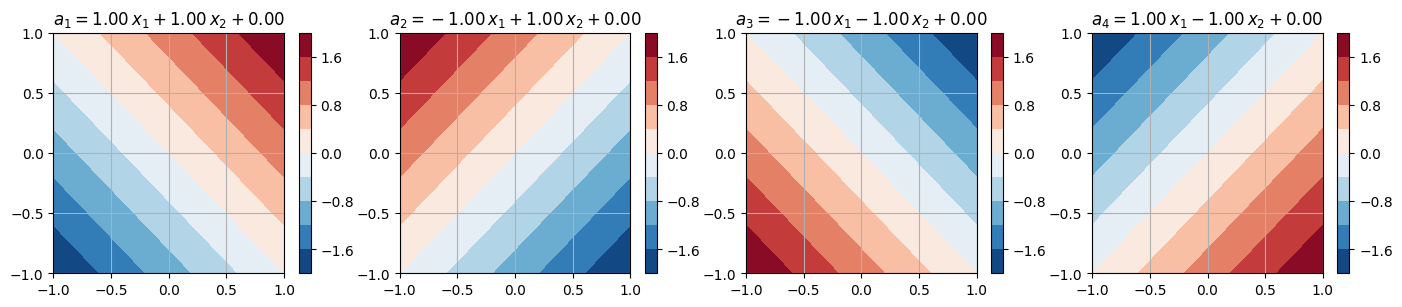

In [2]:
fig, axs = plt.subplots(1, 4, figsize=(14, 3)); fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(-1, 1, 5)); ax.set_yticks(np.linspace(-1, 1, 5));
    ax.grid(); ax.set_title('$a_{:}={:.2f}\,x_1{:+.2f}\,x_2{:+.2f}$'.format(i+1, Wt[0,i], Wt[1,i], b[i]))
    cp = ax.contourf(x1, x2, A[:, i].reshape(x1.shape), 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);

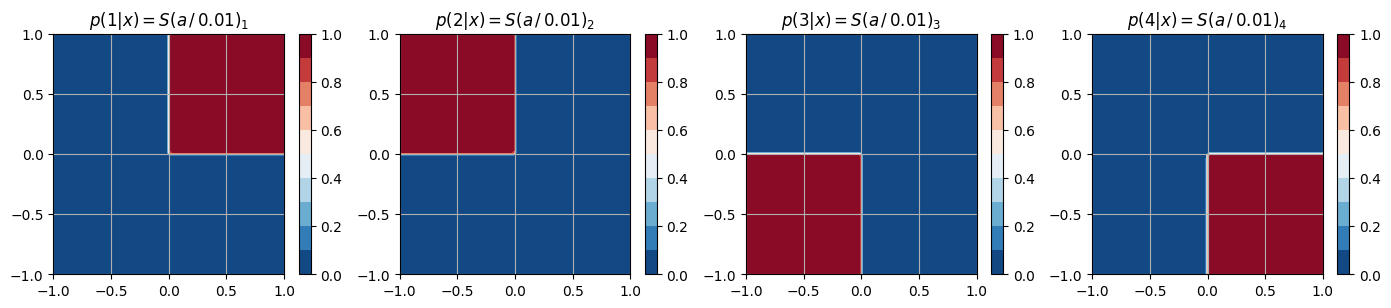

In [3]:
T = .01; A /= T; P = np.exp(A - logsumexp(A, axis=1).reshape(-1, 1))
fig, axs = plt.subplots(1, 4, figsize=(14, 3)); fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(-1, 1, 5)); ax.set_yticks(np.linspace(-1, 1, 5));
    ax.grid(); ax.set_title('$p({}|x)=S(a\,/\,{:.2f})_{}$'.format(i+1, T, i+1))
    cp = ax.contourf(x1, x2, P[:, i].reshape(x1.shape), 10, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax);